In [1]:
##importing the dataset
import pandas as pd
data=pd.read_csv(r"C:\Users\USER\Downloads\vertebrate(2) (1).csv",header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [2]:
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

In [3]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [4]:
##cross tabulation
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [5]:
##decision tree
from sklearn import tree

In [6]:
y=data['Class']

In [7]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [8]:
x=data.drop(['Name','Class'],axis=1)

In [9]:
x

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [11]:
##using the default optimal depth
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
##splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
clf=clf.fit(xtrain,ytrain)

In [89]:
train_prediction=clf.predict(xtrain)

In [96]:
##testing accuracy of model using train data
accuracy_score(ytrain,train_prediction)

1.0

In [15]:
##testing the model using test data
test_prediction=clf.predict(xtest)
test_prediction

array(['mammals', 'non-mammals', 'mammals', 'mammals', 'mammals'],
      dtype=object)

In [88]:
##testing accuracy of the model
accuracy_score(ytest,test_prediction)

1.0

In [17]:
##testing the model using multiple accuracies
import numpy as np
depths=range(1,30)
test_accuracies=np.zeros(len(depths))
train_accuracies=np.zeros(len(depths))

In [18]:
from  sklearn.metrics import accuracy_score

In [19]:
from  sklearn.metrics import accuracy_score

In [20]:
for index, depth in enumerate(depths):
    clf.max_depth=depth
    clf.fit(xtrain,ytrain)
    ypred_train=clf.predict(xtrain)
    ypred_test=clf.predict(xtest)
    train_accuracies[index]=accuracy_score(ytrain,ypred_train)
    test_accuracies[index]=accuracy_score(ytest,ypred_test)
    index+=1

In [21]:
train_accuracies

array([0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. ])

In [62]:
test_accuracies

array([1. , 1. , 0.6, 1. , 0.6, 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.8,
       1. , 0.6, 1. , 0.6, 0.8, 1. , 1. , 0.8, 0.6, 0.8, 0.6, 0.8, 0.8,
       1. , 0.8, 0.8])

Text(0, 0.5, 'Accuracies')

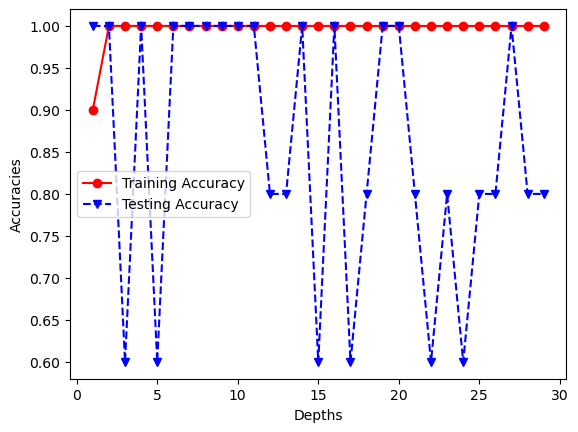

In [24]:
##drawing the plot
import matplotlib.pyplot as plt
plt.plot(depths,train_accuracies,'ro-',depths,test_accuracies,'bv--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Depths')
plt.ylabel('Accuracies')

In [25]:
##maximum train and test accuracies
train_accuracies.max()

1.0

In [26]:
test_accuracies.max()

1.0

In [27]:
##minimum train and test accuracies
train_accuracies.min()

0.9

In [28]:
test_accuracies.min()

0.6

In [72]:
##repeating the decision tree with a depth of 5
clf2=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [73]:
clf2=clf2.fit(xtrain,ytrain)

In [74]:
test_prediction2=clf2.predict(xtest)
test_prediction2

array(['non-mammals', 'mammals', 'mammals', 'mammals', 'mammals'],
      dtype=object)

In [75]:
ytest

3         mammals
7     non-mammals
12        mammals
6         mammals
8         mammals
Name: Class, dtype: object

In [76]:
##testing accuracy of the model
accuracy_score(ytest,test_prediction2)

0.6

In [ ]:
##accuracy of 0.6 is similar to the graph results created at a depth of 5

In [82]:
##testing accuracy at depth 3
clf3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [83]:
clf3=clf3.fit(xtrain,ytrain)

In [84]:
test_prediction3=clf3.predict(xtest)
test_prediction3

array(['mammals', 'non-mammals', 'mammals', 'mammals', 'mammals'],
      dtype=object)

In [85]:
ytest

3         mammals
7     non-mammals
12        mammals
6         mammals
8         mammals
Name: Class, dtype: object

In [86]:
##testing accuracy of the model
accuracy_score(ytest,test_prediction3)

1.0

In [ ]:
##accuracy of 1.0 is similar to the graph results created at a depth of 2. Therefore the default depth of the decision treee model can be 2.

In [ ]:
##interpretation
#the model works well on train data and gives perfect predictions,with an accuracy of 1, from a depth of 2 which plateaus from there.
#the model constantly fluctuates along the depths of the test data, achieving high accuracy of 1, lowest accuracy of 0.6 indicating the model was overfit on the training data